## Corner plots of mcmc inversion

In [1]:
import corner
import emcee
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('pdf', fonttype=42)

plt.style.use("/home/mchristo/proj/libmsc/style/msc.mplstyle")

## Yang + Nish Combine Everything

In [2]:
#sampler = emcee.backends.HDFBackend("../tilt/augustine2006/yang_nish.h5")
#sampler = emcee.backends.HDFBackend("../tilt/augustine2006/yang_nish_250nr.h5")
sampler = emcee.backends.HDFBackend("./augustineInversion/samples/yang_nish_100nr_nm.h5")

samps = sampler.get_chain(discard=150000, thin=10, flat=True)
print(len(samps))

# Scale parameters
psamps = np.copy(samps)
psamps[:, :5] /= 1e3
#psamps[:, 7:9] /= 1e3
psamps[:, 10:] /= 1e3

3100000


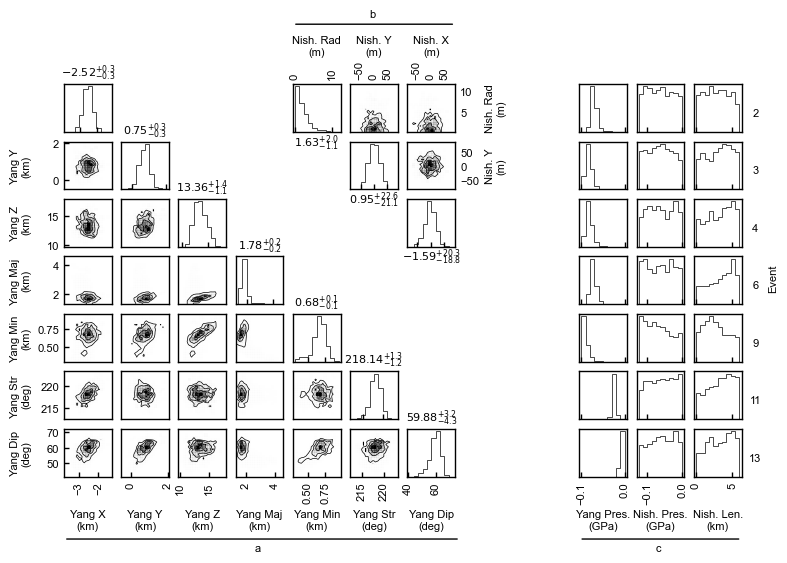

In [3]:
fig, axs = plt.subplots(7, 12, figsize=(0.85*(12/7)*6, 0.85*6))

for ax in axs.flatten():
    ax.axis("off")

# Plot nish geometry
labels = ["Nish. X\n(m)", "Nish. Y\n(m)", "Nish. Rad\n(m)"]
for i in range(0, 3):
    for j in range(4,7):
        axs[i,j].grid(False)
        if(i==j-4):
            axs[i,j].axis("on")
            axs[i,j].set_yticks([])
            axs[i,j].hist(psamps[:,9-i], histtype="step", color="k", linewidth=.5)
            axs[i,j].tick_params(axis="both", direction="in", labelrotation=90, labelbottom=False)

            q_lo, q_mid, q_hi = corner.quantile(psamps[:,9-i], [.16, .5, .84])
            q_m, q_p = q_mid - q_lo, q_hi - q_mid
            fmt = "{{0:{0}}}".format(".2f").format
            fmtsup = "{{0:{0}}}".format(".1f").format
            title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
            title = title.format(fmt(q_mid), fmtsup(q_m), fmtsup(q_p))
            axs[i,j].set_title(title, fontsize=8, y=-.45)
    
        if(i < j-4):
            axs[i,j].axis("on")
            corner.hist2d(psamps[:,9-(j-4)], psamps[:,9-i], ax=axs[i,j], plot_datapoints=False, contour_kwargs={"linewidths":.5})
            axs[i,j].tick_params(axis="both", direction="in", labelbottom=False, labelleft=False, bottom=False, left=False)
            
        if(i == 0):
            axs[i,j].tick_params(axis="x", labeltop=True, top=True, labelrotation=90, labelsize=8)
            #if(j != 4):
            axs[i,j].set_xlabel(labels[2-(j-4)], fontsize=8)
            axs[i,j].xaxis.set_label_position('top') 
                
        if(j == 6):
            axs[i,j].tick_params(axis="y", labelright=True, right=True, labelsize=8)
            if(i != 2):
                axs[i,j].set_ylabel(labels[2-i], fontsize=8, rotation=90)
                axs[i,j].yaxis.set_label_position('right') 


# Plot yang geometry
labels = ["Yang X\n(km)", "Yang Y\n(km)", "Yang Z\n(km)", "Yang Maj\n(km)", "Yang Min\n(km)", "Yang Str\n(deg)", "Yang Dip\n(deg)"]
for i in range(0, 7):
    for j in range(0,7):
        axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
        axs[i,j].grid(False)
        if(i==j):
            axs[i,j].axis("on")
            axs[i,j].set_yticks([])
            axs[i,j].hist(psamps[:,i], histtype="step", color="k", linewidth=.5)
            axs[i,j].tick_params(axis="both", direction="in", labelrotation=90, labelbottom=False)

            q_lo, q_mid, q_hi = corner.quantile(psamps[:,i], [.16, .5, .84])
            q_m, q_p = q_mid - q_lo, q_hi - q_mid
            fmt = "{{0:{0}}}".format(".2f").format
            fmtsup = "{{0:{0}}}".format(".1f").format
            title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
            title = title.format(fmt(q_mid), fmtsup(q_m), fmtsup(q_p))
            axs[i,j].set_title(title, fontsize=8)
            
        if(i > j):
            axs[i,j].axis("on")
            corner.hist2d(psamps[:,j], psamps[:,i], ax=axs[i,j], plot_datapoints=False, contour_kwargs={"linewidths":.5})
            axs[i,j].tick_params(axis="both", direction="in", labelbottom=False, labelleft=False, bottom=False, left=False)            
        if(i == 6):
            axs[i,j].tick_params(axis="x", labelbottom=True, bottom=True, labelrotation=90, labelsize=8)
            #if(j != 6):
            axs[i,j].set_xlabel(labels[j], fontsize=8)
                
        if(j == 0):
            axs[i,j].tick_params(axis="y", labelleft=True, left=True, labelsize=8)
            if(i != 0):
                axs[i,j].set_ylabel(labels[i], fontsize=8)


# Plot pressures and nishimura length
events = [2, 3, 4, 6, 9, 11, 13]
labels = ["Yang Pres.\n(GPa)", "Nish. Pres.\n(GPa)", "Nish. Len.\n(km)"]

for i in range(7):
    for j in range(9,12):
        axs[i,j].grid(False)
        if(j == 11):
            r = (0, 6)
        elif(j==10):
            r = (-.125, 0)
        elif(j==9):
            r = (-.1, 0)
        axs[i,j].axis("on")
        axs[i,j].hist(psamps[:,10+(i*3)+(j-9)], histtype="step", color="k", linewidth=.5, range=r)
        axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
        if(i == 6):
            axs[i,j].tick_params(axis="x", labelbottom=True, labelrotation=90, labelsize=8)
            axs[i,j].set_xlabel(labels[j-9], fontsize=8)
        if(j == 11):
            axs[i,j].set_ylabel(events[i], rotation=0, labelpad=10, fontsize=8)
            axs[i,j].yaxis.set_label_position('right') 

fig.supylabel("Event", fontsize=8, x=0.93, rotation=90)

fig.align_ylabels(axs=axs[:,0])
fig.align_ylabels(axs=axs[:,6])
fig.align_xlabels(axs=axs[6,:])
fig.align_xlabels(axs=axs[0,4:7])

# Add subfig labels
axs[6,0].annotate("", xy=(0, -1.3), xycoords='axes fraction', xytext=(8.3, -1.3), arrowprops=dict(arrowstyle="-", color='k'))
axs[6,0].annotate("a", xy=(4, -1.55), xycoords='axes fraction', fontsize=8)

axs[0,4].annotate("", xy=(0, 2.25), xycoords='axes fraction', xytext=(3.4, 2.25), arrowprops=dict(arrowstyle="-", color='k'))
axs[0,4].annotate("b", xy=(1.6, 2.4), xycoords='axes fraction', fontsize=8)

axs[6,9].annotate("", xy=(0, -1.3), xycoords='axes fraction', xytext=(3.4, -1.3), arrowprops=dict(arrowstyle="-", color='k'))
axs[6,9].annotate("c", xy=(1.6, -1.55), xycoords='axes fraction', fontsize=8)

fig.savefig("./figs/mcmc_yang_nish_fmt.pdf", bbox_inches="tight")

fig.savefig("./figs/png/mcmc_yang_nish_fmt.png", dpi=300, bbox_inches="tight")

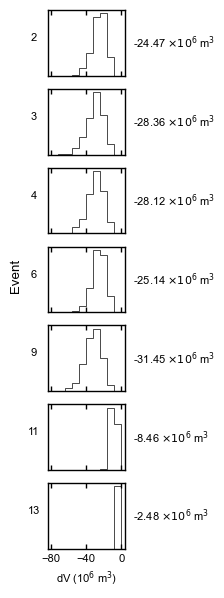

In [4]:
# Calculate pressure chage for all models
pres = 1e9*psamps[:,10::3]

fig, axs = plt.subplots(7, 1, figsize=(1,7))

v = ((1e9)*psamps[:,3]*psamps[:,4]*psamps[:,4])*(4/3)*(np.pi)

events = [2, 3, 4, 6, 9, 11, 13]

r = 80

for i in range(pres.shape[1]):
    axs[i].hist(1e-6*(v*pres[:,i])/9.6e9,  histtype="step", color="k", linewidth=.5, range=(-r, 0))
    if(i != 6):
        axs[i].set_xticklabels([])
        axs[i].set_xticks([-r, -r/2, 0])
    else:
        axs[i].set_xticks([-r, -r/2, 0])
        axs[i].set_xlabel("dV (10$^6$ m$^3$)")
    axs[i].set_yticks([])
    axs[i].set_ylabel(events[i], rotation=0, labelpad=10)
    axs[i].grid(False)
    med = np.median(1e-6*(v*pres[:,i])/9.6e9)
    axs[i].annotate("%.2f $\\times 10^{6}$ m$^3$" % med, (1.1, 0.5), xycoords="axes fraction", va="center")

fig.supylabel("Event", x=-0.25)

fig.savefig("./figs/dv.pdf", bbox_inches="tight")

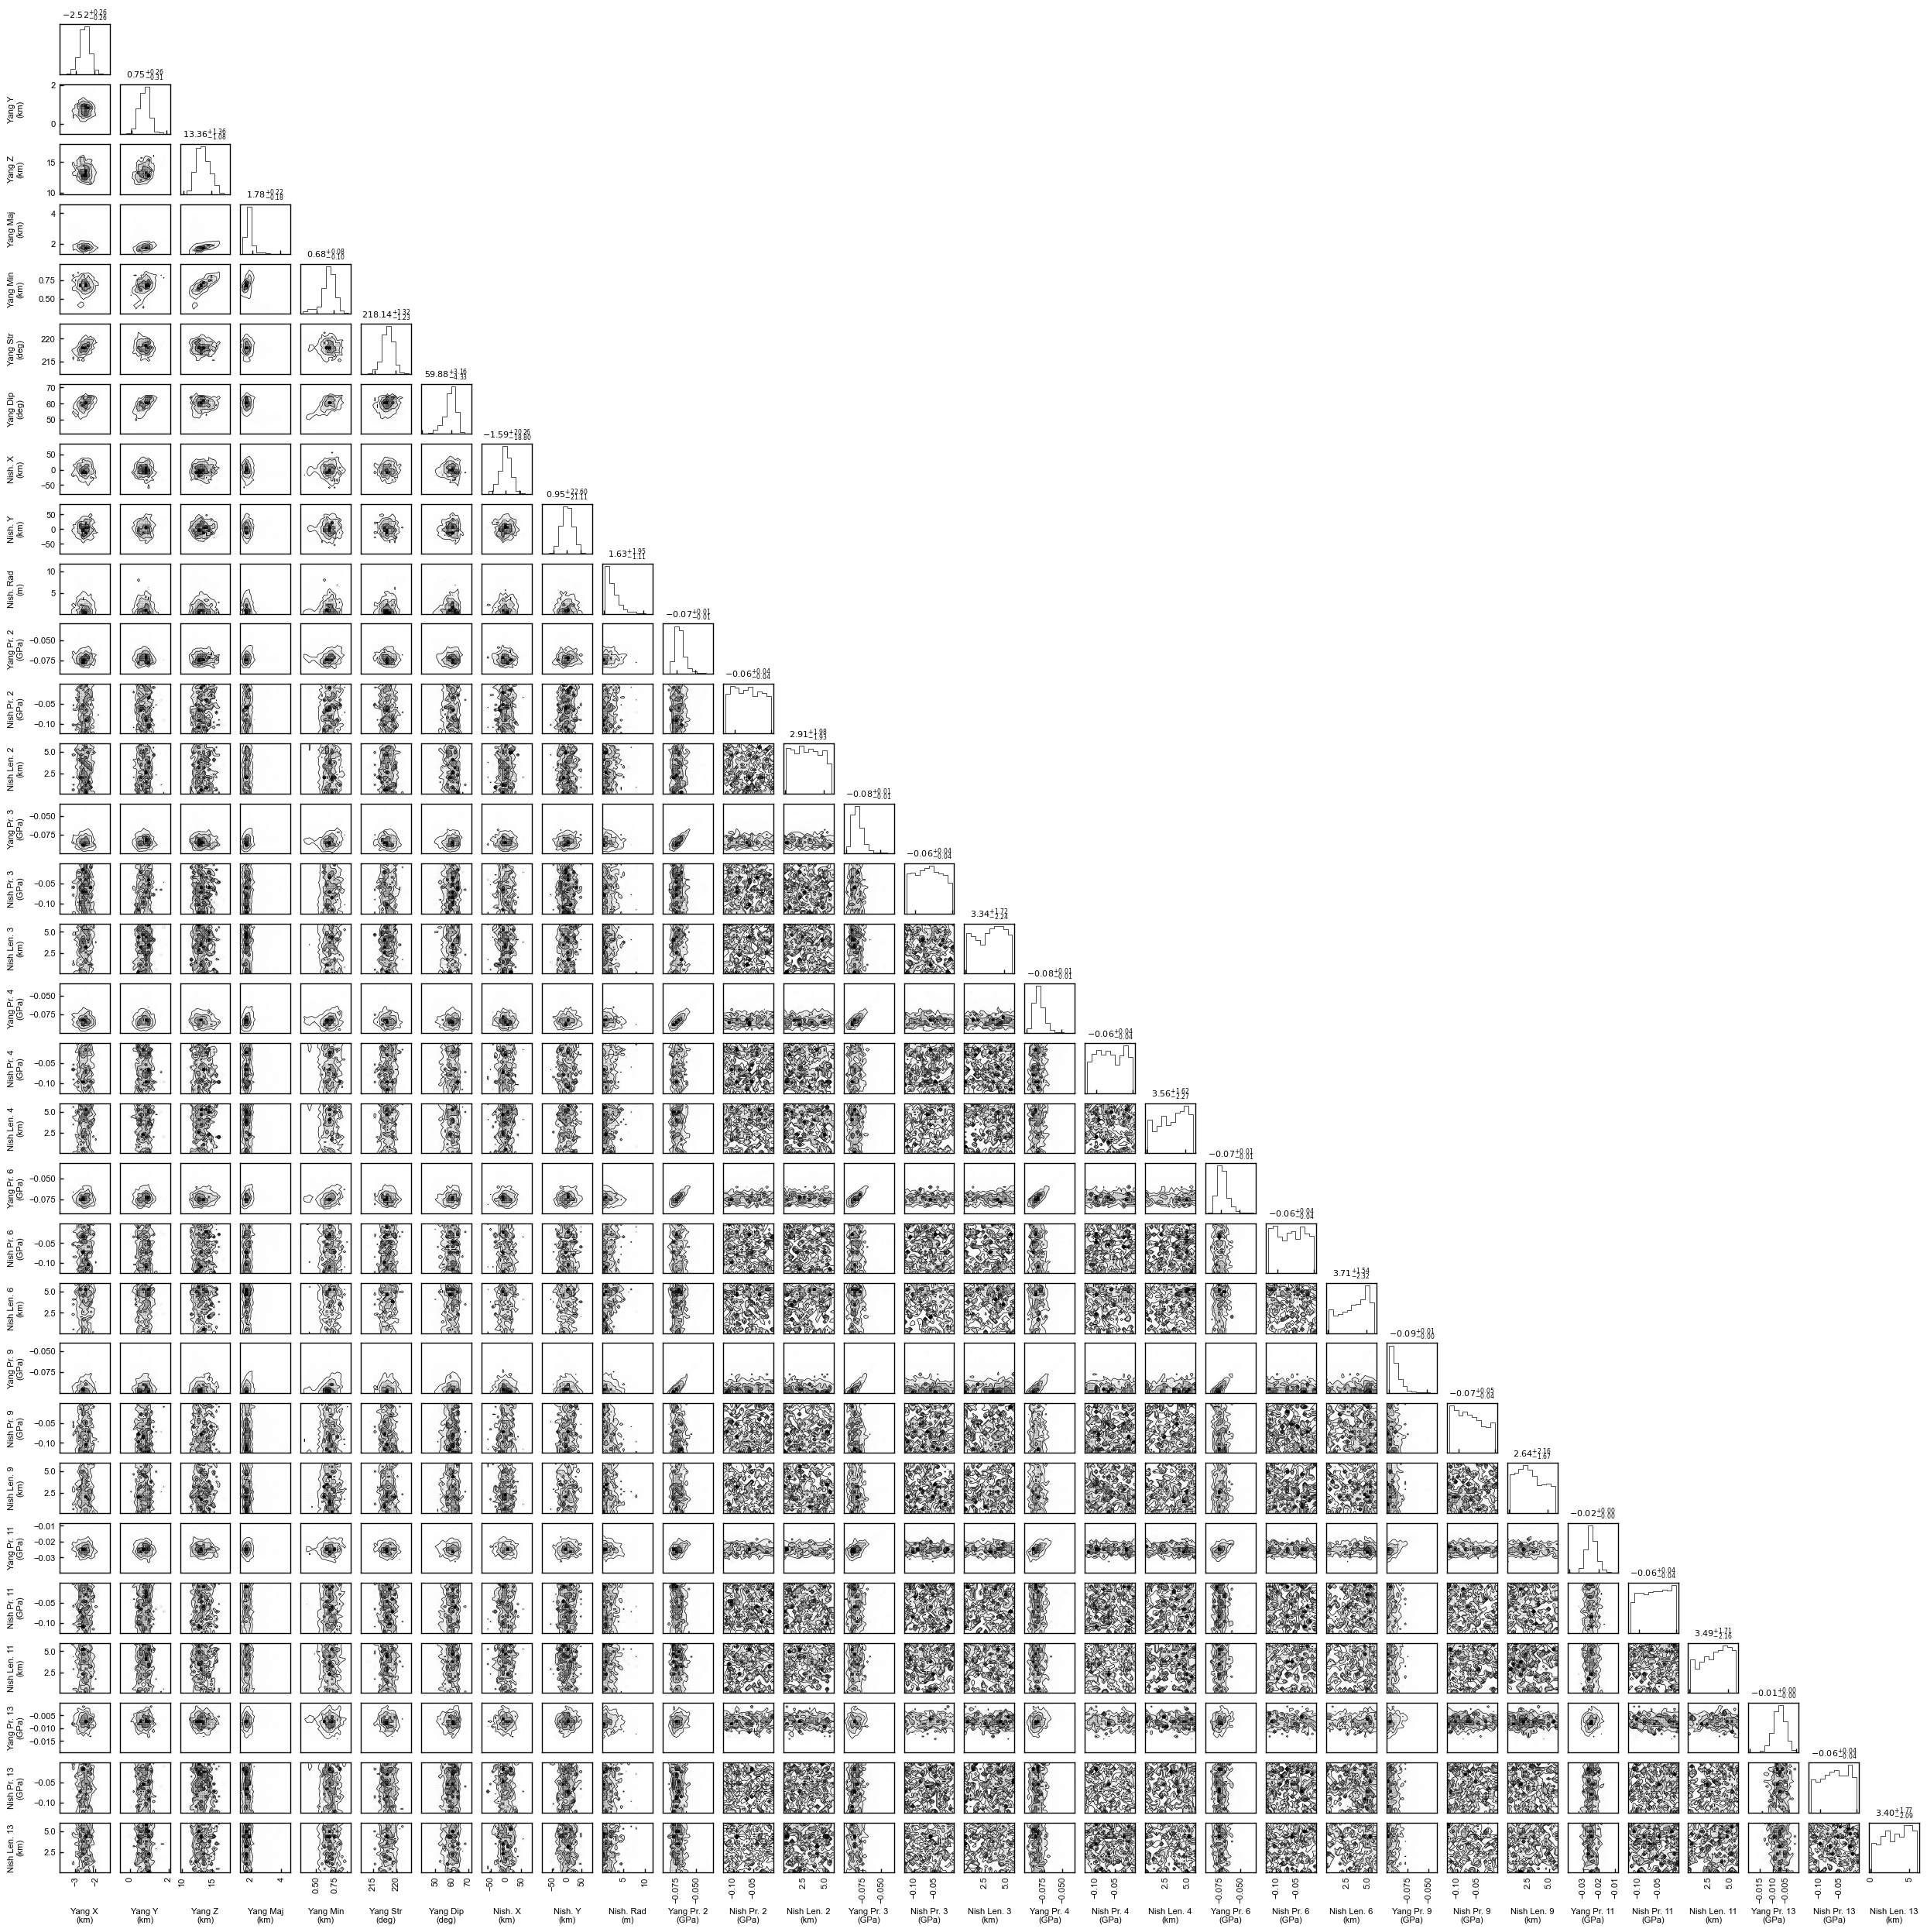

In [5]:
fig, axs = plt.subplots(31, 31, figsize=(31, 31))

for ax in axs.flatten():
    ax.axis("off")

labels = ["Yang X\n(km)", "Yang Y\n(km)", "Yang Z\n(km)", "Yang Maj\n(km)", "Yang Min\n(km)", "Yang Str\n(deg)", "Yang Dip\n(deg)"]
labels += ["Nish. X\n(km)", "Nish. Y\n(km)", "Nish. Rad\n(m)"]

events = [2, 3, 4, 6, 9, 11, 13]
for i in events:
    labels += ["Yang Pr. %d\n(GPa)" % i, "Nish Pr. %d\n(GPa)" % i, "Nish Len. %d\n(km)" % i]

# Plot yang geometry
for i in range(0, 31):
    for j in range(0, 31):
        axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
        axs[i,j].grid(False)
        if(i==j):
            axs[i,j].axis("on")
            axs[i,j].set_yticks([])
            axs[i,j].hist(psamps[:,i], histtype="step", color="k", linewidth=.5)
            axs[i,j].tick_params(axis="both", direction="in", labelrotation=90, labelbottom=False)

            q_lo, q_mid, q_hi = corner.quantile(psamps[:,i], [.16, .5, .84])
            q_m, q_p = q_mid - q_lo, q_hi - q_mid
            fmt = "{{0:{0}}}".format(".2f").format
            fmtsup = "{{0:{0}}}".format(".2f").format
            title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
            title = title.format(fmt(q_mid), fmtsup(q_m), fmtsup(q_p))
            axs[i,j].set_title(title, fontsize=8)
            
        if(i > j):
            axs[i,j].axis("on")
            corner.hist2d(psamps[:,j], psamps[:,i], ax=axs[i,j], plot_datapoints=False, contour_kwargs={"linewidths":.5})
            axs[i,j].tick_params(axis="both", direction="in", labelbottom=False, labelleft=False, bottom=False, left=False)            
        if(i == 30):
            axs[i,j].tick_params(axis="x", labelbottom=True, bottom=True, labelrotation=90, labelsize=8)
            axs[i,j].set_xlabel(labels[j], fontsize=8)
                
        if(j == 0):
            axs[i,j].tick_params(axis="y", labelleft=True, left=True, labelsize=8)
            if(i != 0):
                axs[i,j].set_ylabel(labels[i], fontsize=8)

fig.align_ylabels(axs=axs[:,0])
fig.align_xlabels(axs=axs[30,:])

fig.savefig("./figs/mcmc_yang_nish_corner.pdf", dpi=300, bbox_inches="tight")

# Yang only

In [2]:
sampler = emcee.backends.HDFBackend("./augustineInversion/samples/yang_100nr_nm.h5")
samps = sampler.get_chain(discard=100000, thin=10, flat=True) #[:5000*310,:]
print(len(samps))

# Scale parameters
psamps = np.copy(samps)
psamps[:, :5] /= 1e3
psamps[:, 7:] /= 1e3

4500000


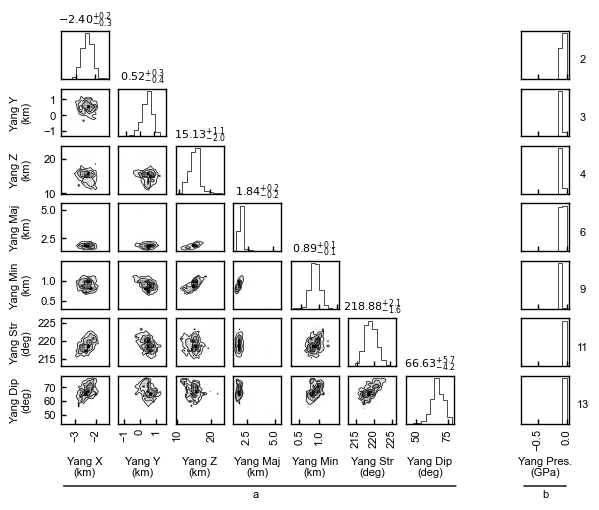

In [3]:
fig, axs = plt.subplots(7, 9, figsize=(0.85*(9/7)*6, 0.85*6))

for ax in axs.flatten():
    ax.axis("off")


# Plot yang geometry
labels = ["Yang X\n(km)", "Yang Y\n(km)", "Yang Z\n(km)", "Yang Maj\n(km)", "Yang Min\n(km)", "Yang Str\n(deg)", "Yang Dip\n(deg)"]
for i in range(0, 7):
    for j in range(0,7):
        axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
        axs[i,j].grid(False)
        if(i==j):
            axs[i,j].axis("on")
            axs[i,j].set_yticks([])
            axs[i,j].hist(psamps[:,i], histtype="step", color="k", linewidth=.5)
            axs[i,j].tick_params(axis="both", direction="in", labelrotation=90, labelbottom=False)

            q_lo, q_mid, q_hi = corner.quantile(psamps[:,i], [.16, .5, .84])
            q_m, q_p = q_mid - q_lo, q_hi - q_mid
            fmt = "{{0:{0}}}".format(".2f").format
            fmtsup = "{{0:{0}}}".format(".1f").format
            title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
            title = title.format(fmt(q_mid), fmtsup(q_m), fmtsup(q_p))
            axs[i,j].set_title(title, fontsize=8)
            
        if(i > j):
            axs[i,j].axis("on")
            corner.hist2d(psamps[:,j], psamps[:,i], ax=axs[i,j], plot_datapoints=False, contour_kwargs={"linewidths":.5})
            axs[i,j].tick_params(axis="both", direction="in", labelbottom=False, labelleft=False, bottom=False, left=False)            
        if(i == 6):
            axs[i,j].tick_params(axis="x", labelbottom=True, bottom=True, labelrotation=90, labelsize=8)
            #if(j != 6):
            axs[i,j].set_xlabel(labels[j], fontsize=8)
                
        if(j == 0):
            axs[i,j].tick_params(axis="y", labelleft=True, left=True, labelsize=8)
            if(i != 0):
                axs[i,j].set_ylabel(labels[i], fontsize=8)


# Plot pressures and nishimura length
events = [2, 3, 4, 6, 9, 11, 13]
labels = ["Yang Pres.\n(GPa)"]

j = 8
for i in range(7):
        axs[i,j].grid(False)
        r = (-0.75, 0)
        axs[i,j].axis("on")
        axs[i,j].hist(psamps[:,7+i], histtype="step", color="k", linewidth=.5, range=r)
        axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
        if(i == 6):
            axs[i,j].tick_params(axis="x", labelbottom=True, labelrotation=90, labelsize=8)
            axs[i,j].set_xlabel(labels[0], fontsize=8)
        if(j == 8):
            axs[i,j].set_ylabel(events[i], rotation=0, labelpad=10, fontsize=8)
            axs[i,j].yaxis.set_label_position('right') 

fig.align_ylabels(axs=axs[:,0])
fig.align_ylabels(axs=axs[:,6])
fig.align_xlabels(axs=axs[6,:])
fig.align_xlabels(axs=axs[0,4:7])

# Add subfig labels
axs[6,0].annotate("", xy=(0, -1.3), xycoords='axes fraction', xytext=(8.3, -1.3), arrowprops=dict(arrowstyle="-", color='k'))
axs[6,0].annotate("a", xy=(4, -1.55), xycoords='axes fraction', fontsize=8)

axs[6,8].annotate("", xy=(0, -1.3), xycoords='axes fraction', xytext=(1, -1.3), arrowprops=dict(arrowstyle="-", color='k'))
axs[6,8].annotate("b", xy=(0.45, -1.55), xycoords='axes fraction', fontsize=8)

fig.savefig("./figs/mcmc_yang_fmt.pdf", dpi=300, bbox_inches="tight")


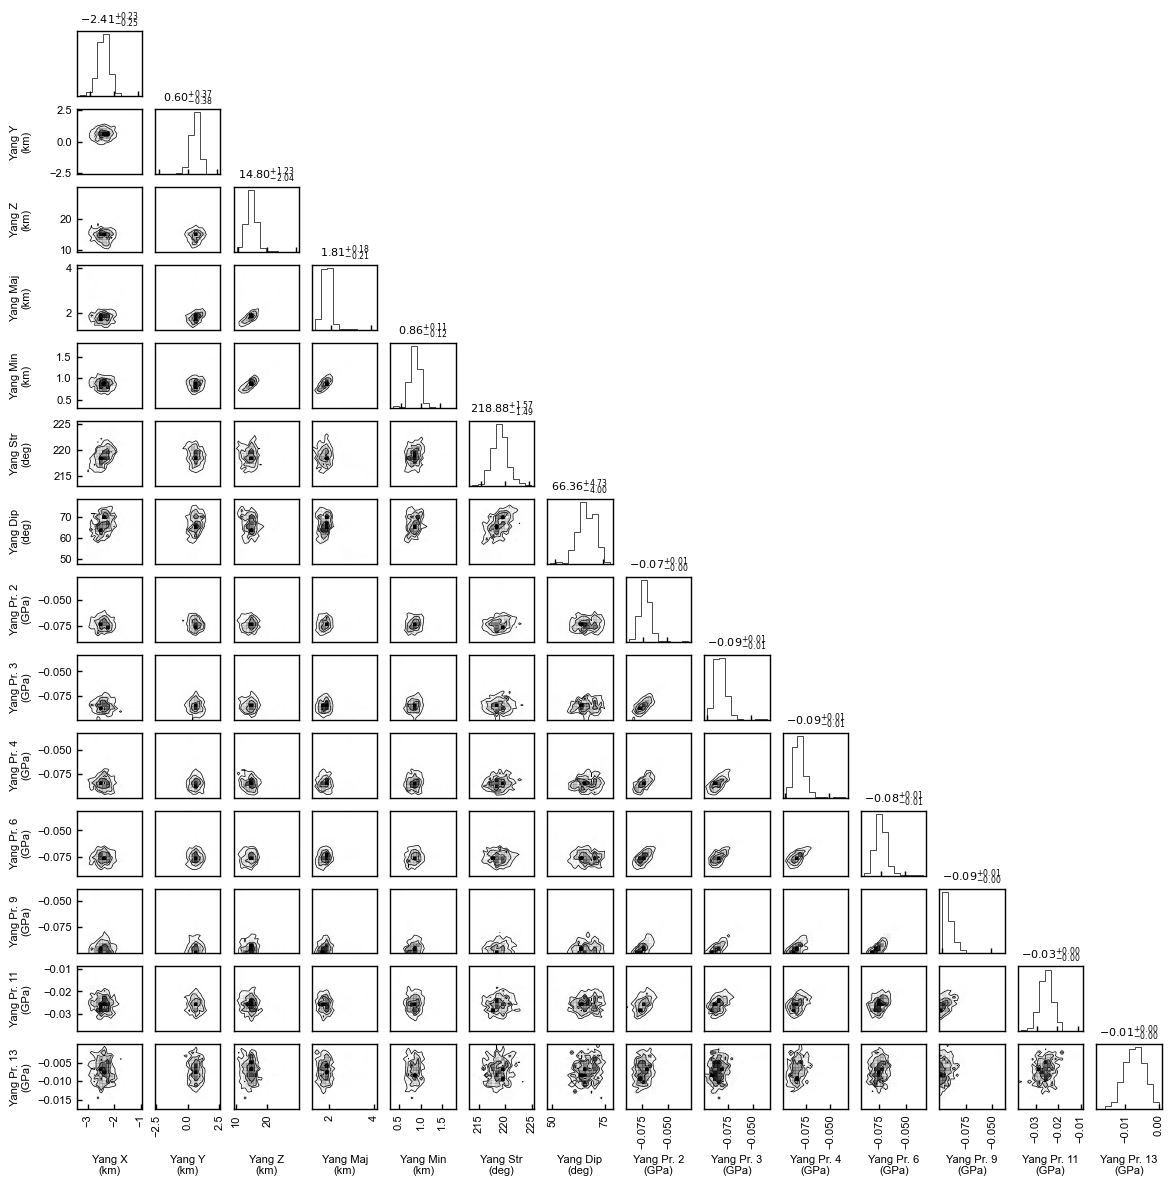

In [8]:
fig, axs = plt.subplots(14, 14, figsize=(14, 14))

for ax in axs.flatten():
    ax.axis("off")

labels = ["Yang X\n(km)", "Yang Y\n(km)", "Yang Z\n(km)", "Yang Maj\n(km)", "Yang Min\n(km)", "Yang Str\n(deg)", "Yang Dip\n(deg)"]

events = [2, 3, 4, 6, 9, 11, 13]
for i in events:
    labels += ["Yang Pr. %d\n(GPa)" % i]

# Plot yang geometry
for i in range(0, 14):
    for j in range(0, 14):
        axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
        axs[i,j].grid(False)
        if(i==j):
            axs[i,j].axis("on")
            axs[i,j].set_yticks([])
            axs[i,j].hist(psamps[:,i], histtype="step", color="k", linewidth=.5)
            axs[i,j].tick_params(axis="both", direction="in", labelrotation=90, labelbottom=False)

            q_lo, q_mid, q_hi = corner.quantile(psamps[:,i], [.16, .5, .84])
            q_m, q_p = q_mid - q_lo, q_hi - q_mid
            fmt = "{{0:{0}}}".format(".2f").format
            fmtsup = "{{0:{0}}}".format(".2f").format
            title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
            title = title.format(fmt(q_mid), fmtsup(q_m), fmtsup(q_p))
            axs[i,j].set_title(title, fontsize=8)
            
        if(i > j):
            axs[i,j].axis("on")
            corner.hist2d(psamps[:,j], psamps[:,i], ax=axs[i,j], plot_datapoints=False, contour_kwargs={"linewidths":.5})
            axs[i,j].tick_params(axis="both", direction="in", labelbottom=False, labelleft=False, bottom=False, left=False)            
        if(i == 13):
            axs[i,j].tick_params(axis="x", labelbottom=True, bottom=True, labelrotation=90, labelsize=8)
            axs[i,j].set_xlabel(labels[j], fontsize=8)
                
        if(j == 0):
            axs[i,j].tick_params(axis="y", labelleft=True, left=True, labelsize=8)
            if(i != 0):
                axs[i,j].set_ylabel(labels[i], fontsize=8)

fig.align_ylabels(axs=axs[:,0])
fig.align_xlabels(axs=axs[13,:])

fig.savefig("./figs/mcmc_yang_corner.pdf", dpi=300, bbox_inches="tight")

## Fixed geometry

In [ ]:
np.median(samps, axis=0)

In [ ]:
events = list(range(1,14))

labels = ["Yang Pr.\n(GPa)", "Nish Pres.\n(GPa)", "Nish Len.\n(km)"]
for event in events:
    fig, axs = plt.subplots(3, 3, figsize=(3, 3))
    
    for ax in axs.flatten():
        ax.axis("off")
    # Load samples of pressure parameters
    sampler = emcee.backends.HDFBackend("../tilt/augustine2006/pressure_fixgeo_samples/pressure_fixgeo_event%d.h5" % event)
    samps = sampler.get_chain(discard=50000, thin=20, flat=True)
    psamps = samps/1e3
    
    # Plot yang geometry
    for i in range(0, 3):
        for j in range(0, 3):
            axs[i,j].tick_params(axis="both", left=False, labelleft=False, labelbottom=False, direction="in", right=False, top=False)
            axs[i,j].grid(False)
            if(i==j):
                axs[i,j].axis("on")
                axs[i,j].set_yticks([])
                axs[i,j].hist(psamps[:,i], histtype="step", color="k", linewidth=.5)
                axs[i,j].tick_params(axis="both", direction="in", labelrotation=90, labelbottom=False)
    
                q_lo, q_mid, q_hi = corner.quantile(psamps[:,i], [.16, .5, .84])
                q_m, q_p = q_mid - q_lo, q_hi - q_mid
                fmt = "{{0:{0}}}".format(".2f").format
                fmtsup = "{{0:{0}}}".format(".2f").format
                title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
                title = title.format(fmt(q_mid), fmtsup(q_m), fmtsup(q_p))
                axs[i,j].set_title(title, fontsize=8)
                
            if(i > j):
                axs[i,j].axis("on")
                corner.hist2d(psamps[:,j], psamps[:,i], ax=axs[i,j], plot_datapoints=False, contour_kwargs={"linewidths":.5})
                axs[i,j].tick_params(axis="both", direction="in", labelbottom=False, labelleft=False, bottom=False, left=False)            
            if(i == 2):
                axs[i,j].tick_params(axis="x", labelbottom=True, bottom=True, labelrotation=90, labelsize=8)
                axs[i,j].set_xlabel(labels[j], fontsize=8)
                    
            if(j == 0):
                axs[i,j].tick_params(axis="y", labelleft=True, left=True, labelsize=8)
                if(i != 0):
                    axs[i,j].set_ylabel(labels[i], fontsize=8)
    
    fig.align_ylabels(axs=axs[:,0])
    fig.align_xlabels(axs=axs[2,:])